# **Proyecto Final - Alvaro Vargas**

Este dataset contiene información detallada sobre las cinco principales ligas de fútbol de Europa, incluyendo estadísticas individuales de cada jugador, como minutos jugados, goles, asistencias y datos adicionales, como la liga en la que compiten y su nacionalidad.

El dataset tomado se puede encontrar en Kaggle: https://www.kaggle.com/datasets/orkunaktas/all-football-players-stats-in-top-5-leagues-2324

El dataset contenia mas columnas pero que no tenian interés para ser analizadas
por lo que se limpió la información dejando 19 columnas y las filas siempre fueron las mismas porque marca la cantidad de jugadores.

Objetivo

Este dataset está diseñado para ser una herramienta útil para analistas y estadísticos interesados en evaluar el desempeño individual de cada jugador durante una temporada. Si bien este análisis se centra en un único año, la información puede ser utilizada para analizar tendencias, evaluar progresos y realizar comparaciones en el tiempo.

Las variables principales de interés incluyen:

Liga: Liga en la que participa cada jugador.
Posición: Posición que ocupa cada jugador en el campo.
Edad: Edad de los jugadores.
Minutos: Minutos jugados por cada jugador durante la temporada.
Tarjetas Rojas: Cantidad de tarjetas rojas recibidas en la temporada.
Tarjetas Amarillas: Cantidad de tarjetas amarillas recibidas en la temporada.

HIPOTESIS

1. A mayor cantidad de minutos jugados, mayor será el número de goles y asistencias."

2. "Los jugadores en la posición de defensa son más propensos a recibir tarjetas amarillas o rojas en comparación con otras posiciones."

3. "Los jugadores en la posicion de delantero suelen anotar mas goles debido a las posibilidades que tienen de estar frente a situaciones de gol"


Archivo xlsx: https://drive.google.com/drive/folders/10IhseQvks1BdQlZJ3ZlELvGLKlaVy0yd

Esta información está orientada a proporcionar una visión clara y práctica para analizar las estadísticas de los jugadores en las principales ligas europeas, facilitando la toma de decisiones estratégicas y evaluaciones de desempeño.


In [33]:
#importo las librerías a usar
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
# Ruta del archivo en tu Google Drive
file_path = '/content/drive/My Drive/Entrega-Proyecto-Final-Alvaro-Vargas/Jugadores-Top5Ligas.csv'

# Try different delimiters
try:
    df = pd.read_csv(file_path, sep=',')  # Try comma first
except pd.errors.ParserError:
    try:
        df = pd.read_csv(file_path, sep=';')  # Try semicolon
    except pd.errors.ParserError:
        try:
            df = pd.read_csv(file_path, sep='\t')  # Try tab
        except pd.errors.ParserError:
            df = pd.read_csv(file_path, sep=' ')  # Try space as a last resort

# Display the first 5 rows to confirm correct parsing
print(df.head())

   ID            Jugador Nacionalidad Posicion          Equipo  \
0   1         Max Aarons      eng ENG       DF     Bournemouth   
1   2   Brenden Aaronson       us USA    MF,FW    Union Berlin   
2   3    Paxten Aaronson       us USA       MF  Eint Frankfurt   
3   4  Keyliane Abdallah       fr FRA       FW       Marseille   
4   5   Yunis Abdelhamid       ma MAR       DF           Reims   

                 Liga  Edad  Nacimiento  Partidos  Partidos-titular  Minutos  \
0  eng Premier League  23.0      2000.0        20                13     1237   
1       de Bundesliga  22.0      2000.0        30                14     1267   
2       de Bundesliga  19.0      2003.0         7                 1      101   
3          fr Ligue 1  17.0      2006.0         1                 0        4   
4          fr Ligue 1  35.0      1987.0        31                31     2781   

   Goles  Asistencias  G+A  Gol-Penal  Amarillas  Rojas  Goles-esperados  xAG  
0      0            1    1          0     

In [36]:
#verificacion si hay nulos o no
df.isnull().sum()

,0
ID,0
Jugador,0
Nacionalidad,3
Posicion,0
Equipo,0
Liga,0
Edad,4
Nacimiento,4
Partidos,0
Partidos-titular,0


In [37]:
mpl.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [38]:
#defino estilo de matplot lib
mpl.style.use('classic')

# 1. GRAFICOS CON MATPLOT LIB

# 1.1 **GRÁFICO DE TORTA**

In [39]:
#Separamos el dataframe
df_2=df[['ID','Liga']].groupby(by='Liga').count()
df_2

,ID
Liga,
de Bundesliga,507
eng Premier League,580
es La Liga,609
fr Ligue 1,540
it Serie A,616


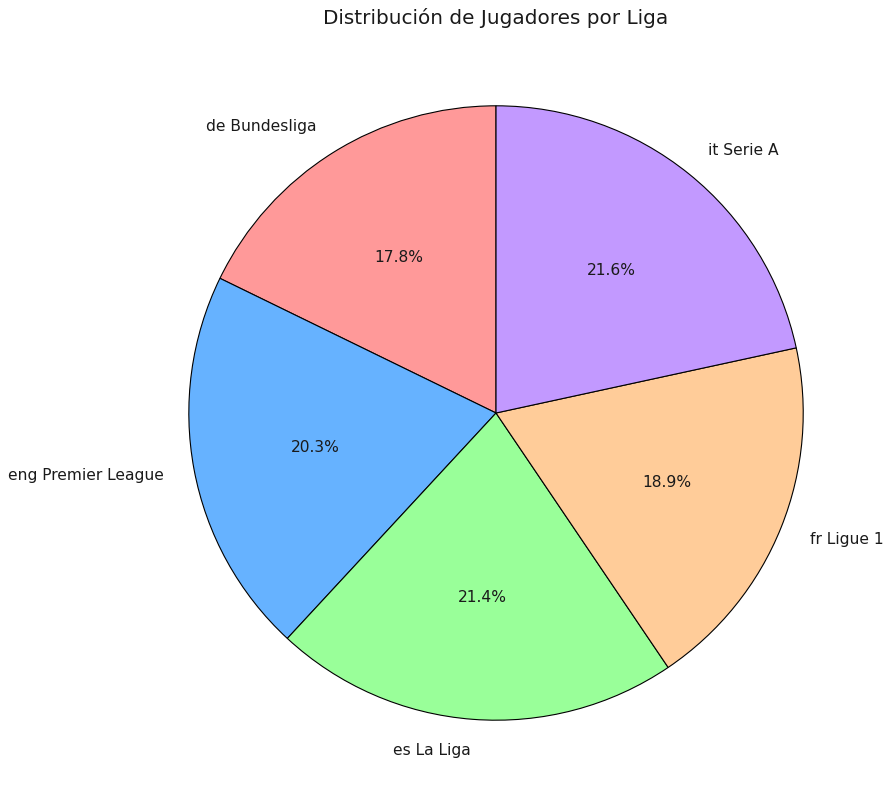

In [40]:
# Datos de ejemplo
sizes = df_2.ID  # Tamaños de cada sección
labels = df_2.index  # Etiquetas
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#C299FF']  # Colores personalizados

# Crear gráfico
fig, ax = plt.subplots(figsize=(16, 12))  # Cambiar tamaño
ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,  # Rotar para empezar en la parte superior
    wedgeprops={'edgecolor': 'black'},  # Bordes en negro
    textprops={'fontsize': 14}  # Tamaño de texto
)

# Título
ax.set_title('Distribución de Jugadores por Liga', fontsize=18)

# Fondo blanco
fig.patch.set_facecolor('white')

# Mostrar gráfico
plt.show()

Conclusiones sobre la gráfica


Distribución uniforme entre ligas: La gráfica muestra que las ligas tienen una
distribución relativamente equilibrada en cuanto al número de jugadores, con porcentajes que oscilan entre el 17.8% y el 21.6%. Esto sugiere que no hay una liga que monopolice significativamente la cantidad de jugadores.


Mayor representación en la Serie A: La liga italiana (Serie A) tiene la mayor
proporción de jugadores con un 21.6%. Esto podría indicar que esta liga tiende a atraer más jugadores, posiblemente debido a factores como la popularidad, presupuesto de equipos o competitividad.


Menor representación en la Bundesliga: La liga alemana (Bundesliga) tiene la menor proporción de jugadores con un 17.8%. Esto podría deberse a características de la liga, como un enfoque en menos fichajes extranjeros o una plantilla más compacta.


Equilibrio general: Las demás ligas (Premier League, La Liga, y otras) tienen proporciones similares, lo que denota una paridad en términos de cantidad de jugadores entre las principales ligas europeas.

# 1.2 GRÁFICO DE HISTOGRAMA

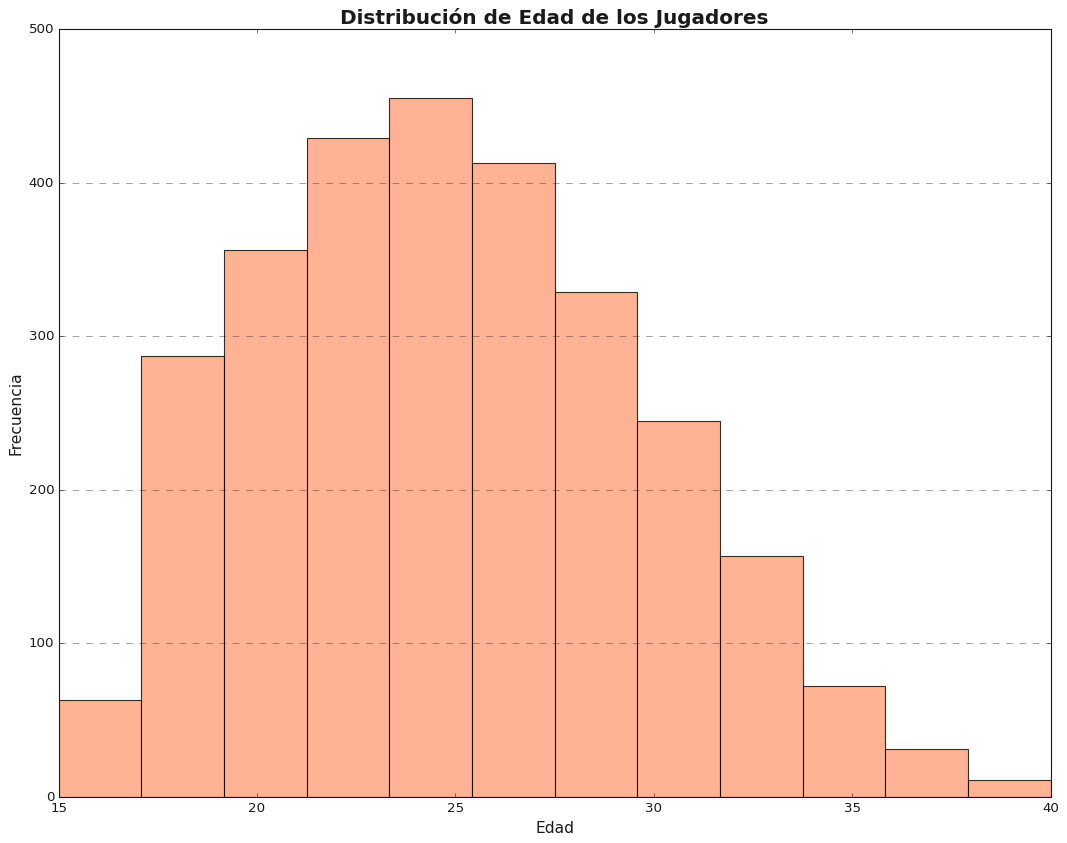

In [41]:
#Generamos el gráfico.
# Mejoramos el diseño del histograma
plt.figure(figsize=(16, 12), facecolor='white')  # Tamaño más grande
ax = plt.gca()  # Obtener el objeto de los ejes
ax.set_facecolor('white')  # Fondo blanco en los ejes
plt.hist(
    df['Edad'],
    bins=12,  # Aumentar o ajustar el número de bins para más detalle
    color='#FFA07A',  # Color personalizado
    edgecolor='black',  # Bordes negros para mayor claridad
    alpha=0.8  # Transparencia para una visualización más suave
)

# Títulos y etiquetas
plt.title('Distribución de Edad de los Jugadores', fontsize=18, fontweight='bold')  # Título más llamativo
plt.xlabel('Edad', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Agregamos una cuadrícula
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Líneas horizontales para facilitar la lectura

# Mostrar gráfico
plt.show()

Conclusiones sobre la gráfica

Grupo más frecuente: La mayoría de los jugadores tienen edades entre los 25 y 30 años, lo que sugiere que este es el rango etario de mayor actividad profesional en el fútbol.


Juventud en el fútbol: Hay una cantidad considerable de jugadores entre los 20 y 25 años, lo que podría indicar que los clubes priorizan el talento joven.


Reducción después de los 30: Se observa una notable disminución en la cantidad de jugadores mayores de 30 años, lo cual es consistente con la tendencia de menor participación de jugadores mayores debido a factores físicos y de rendimiento.


Poca representación juvenil: Existen muy pocos jugadores menores de 20 años, probablemente porque muchos aún están en desarrollo o en categorías juveniles.

# 1.3 GRÁFICO DE BARRAS APILADAS


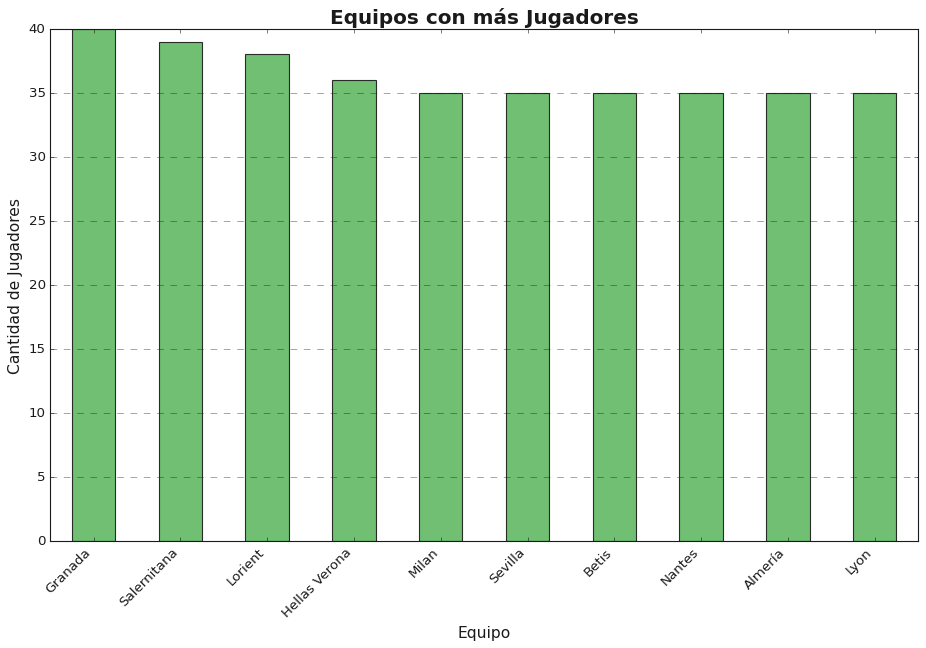

In [42]:
#Generamos el gráfico

plt.figure(figsize=(14, 8), facecolor='white')  # Aumentar tamaño del gráfico
ax = plt.gca()  # Obtener el objeto de los ejes
ax.set_facecolor('white')  # Fondo blanco en los ejes
df['Equipo'].value_counts().head(10).plot(
    kind='bar',
    color='#4CAF50',  # Cambiar a un verde más atractivo
    edgecolor='black',  # Bordes negros para mayor contraste
    alpha=0.8  # Añadir transparencia
)

# Títulos y etiquetas
plt.title('Equipos con más Jugadores', fontsize=18, fontweight='bold')  # Título más grande y en negrita
plt.xlabel('Equipo', fontsize=14)
plt.ylabel('Cantidad de Jugadores', fontsize=14)

# Rotación de etiquetas en el eje X
plt.xticks(rotation=45, fontsize=12, ha='right')  # Mejor alineación de etiquetas

# Cuadrícula horizontal para facilitar lectura
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Fondo blanco
plt.gca().set_facecolor('white')

# Mostrar gráfico
plt.show()

Conclusiones sobre la gráfica

Granada lidera en jugadores registrados: El equipo con la mayor cantidad de jugadores registrados es el Granada, con casi 40 jugadores. Esto podría indicar que tiene una plantilla extensa o muchos jugadores en su registro.


Equipos con plantillas similares: Los equipos Salernitana, Lorient, Hellas Verona, y Lyon tienen cantidades de jugadores muy similares, lo que sugiere una homogeneidad en el tamaño de sus plantillas principales.


Distribución equilibrada: Aunque hay ligeras diferencias entre los equipos, los diez equipos con más jugadores registrados tienen cantidades relativamente cercanas, lo que refleja una tendencia general en la gestión de plantillas.


Ligas con mayor representación: Algunos equipos representados podrían provenir de ligas con más flexibilidad en el tamaño de plantillas o con estrategias específicas para retener jugadores.

# 2. GRÁFICOS CON SEABORN

# 2.1 GRÁFICO DE DISPERSION

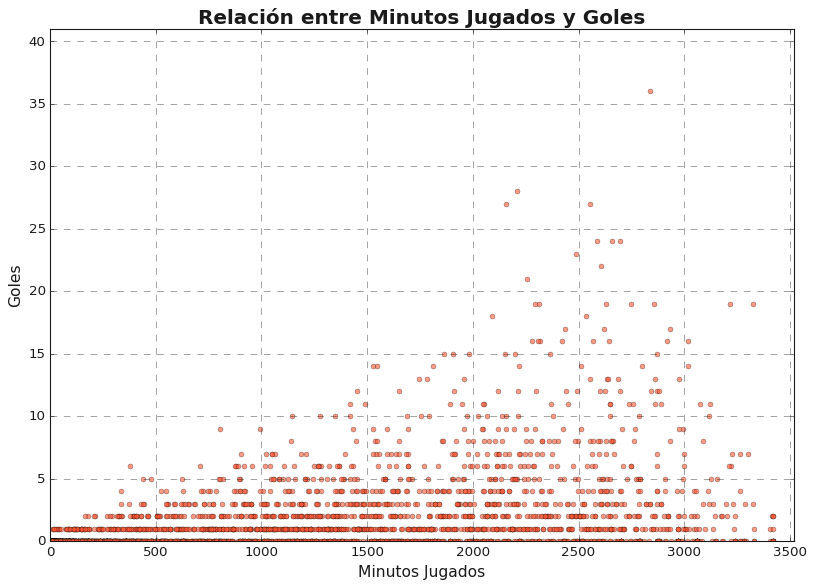

In [43]:
# Configuración del gráfico
plt.figure(figsize=(12, 8), facecolor='white')  # Fondo blanco en la figura
ax = plt.gca()  # Obtener el objeto de los ejes
ax.set_facecolor('white')  # Fondo blanco en los ejes

# Graficar los datos
sns.scatterplot(
    x='Minutos',
    y='Goles',
    data=df,
    color='#FF5733',  # Color de los puntos
    alpha=0.6,  # Transparencia
    edgecolor='black'  # Bordes de los puntos
)

# Títulos y etiquetas
plt.title('Relación entre Minutos Jugados y Goles', fontsize=18, fontweight='bold')
plt.xlabel('Minutos Jugados', fontsize=14)
plt.ylabel('Goles', fontsize=14)

# Límites y cuadrícula
plt.xlim(0, df['Minutos'].max() + 100)
plt.ylim(0, df['Goles'].max() + 5)
plt.grid(linestyle='--', alpha=0.7)

# Mostrar gráfico
plt.show()

Conclusión sobre la gráfica:

Relación positiva: Se observa una relación general positiva entre los minutos jugados y los goles. A medida que los jugadores acumulan más minutos, tienden a marcar más goles.

Densidad en la base: Hay una concentración significativa de jugadores con pocos goles (0-5) incluso con un número considerable de minutos jugados. Esto sugiere que muchos jugadores no tienen un papel ofensivo destacado o enfrentan dificultades para anotar.

Pocos jugadores con altos goles: Solo unos pocos jugadores logran superar los 20 goles, incluso jugando un número elevado de minutos. Estos podrían ser los goleadores estrella o delanteros principales de sus equipos.

Valores atípicos: Algunos puntos destacan en la parte superior derecha, lo que representa jugadores excepcionales que logran altos minutos jugados y goles anotados.

# 2.2 GRAFICO DE BOXPLOT

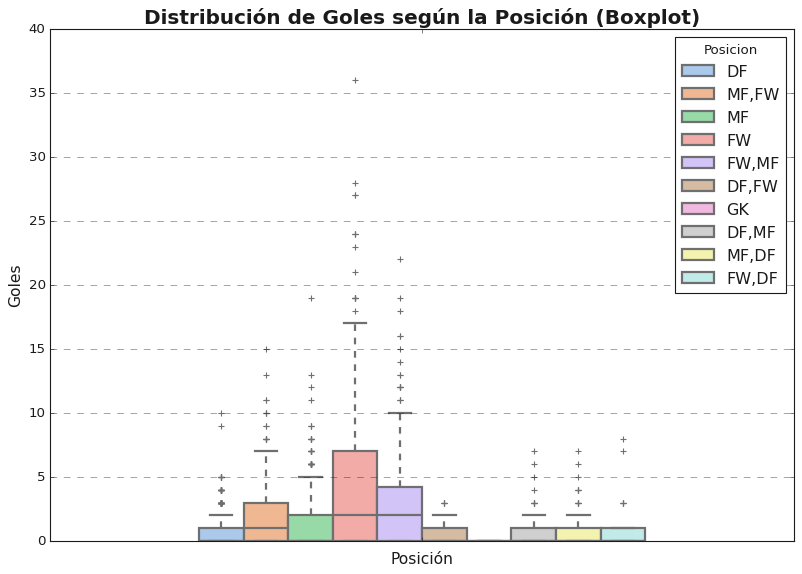

In [44]:
# Configuración del gráfico
plt.figure(figsize=(12, 8), facecolor='white')  # Fondo blanco para la figura
ax = plt.gca()  # Obtener el objeto de los ejes
ax.set_facecolor('white')  # Fondo blanco para los ejes

# Crear el boxplot con mejoras
sns.boxplot(
    hue='Posicion',
    y='Goles',
    data=df,
    palette='pastel',  # Cambiar a una paleta de colores suave
    width=0.6,  # Ajustar el ancho de las cajas
    linewidth=2  # Aumentar el grosor de las líneas
)

# Títulos y etiquetas
plt.title('Distribución de Goles según la Posición (Boxplot)', fontsize=18, fontweight='bold')
plt.xlabel('Posición', fontsize=14)
plt.ylabel('Goles', fontsize=14)

# Cuadrícula para facilitar la lectura
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar gráfico
plt.show()

Conclusiones de la gráfica:

Variabilidad en los goles según la posición:

Las posiciones ofensivas (e.g., delanteros) tienen una mayor dispersión de goles y valores máximos más altos, lo que refleja su rol predominante en marcar goles.
Las posiciones defensivas (e.g., defensas y porteros) tienen valores de goles muy bajos, lo cual es esperado debido a sus funciones en el campo.
Presencia de valores atípicos:

Existen algunos valores atípicos en todas las posiciones, lo que indica que jugadores específicos se destacan por marcar una cantidad de goles significativamente mayor que el promedio para su posición.
Goles concentrados:

En la mayoría de las posiciones, los goles se concentran en rangos bajos (e.g., de 0 a 5 goles), lo que refleja que la mayoría de los jugadores no son goleadores frecuentes.
Distribución uniforme para roles secundarios:

En posiciones no ofensivas, como mediocampistas, los goles están más uniformemente distribuidos, aunque en un rango bajo.


# 2.3 GRÁFICO DE BARRAS APILADAS

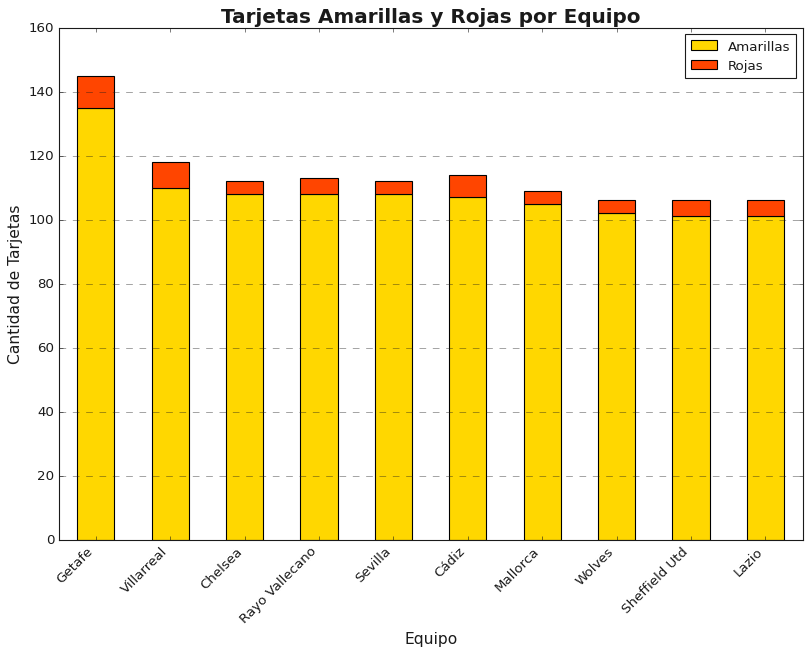

In [45]:
# Configuración del gráfico
plt.figure(figsize=(12, 8), facecolor='white')  # Fondo blanco
ax = plt.gca()
ax.set_facecolor('white')  # Fondo blanco en los ejes

# Crear el gráfico apilado con colores personalizados
data_grouped = df.groupby('Equipo').sum()[['Amarillas', 'Rojas']].sort_values(by='Amarillas', ascending=False).head(10)
data_grouped.plot(
    kind='bar',
    stacked=True,
    color=['#FFD700', '#FF4500'],  # Amarillo dorado y rojo más atractivo
    edgecolor='black',
    ax=ax
)

# Títulos y etiquetas
plt.title('Tarjetas Amarillas y Rojas por Equipo', fontsize=18, fontweight='bold')
plt.xlabel('Equipo', fontsize=14)
plt.ylabel('Cantidad de Tarjetas', fontsize=14)

# Rotación y alineación de etiquetas del eje X
plt.xticks(rotation=45, fontsize=12, ha='right')

# Leyenda personalizada
plt.legend(['Amarillas', 'Rojas'], loc='upper right', fontsize=12)

# Cuadrícula en el eje Y
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar gráfico
plt.show()

Conclusiones de la gráfica:

Getafe lidera en tarjetas amarillas:

El equipo Getafe es el que más tarjetas amarillas ha recibido, lo que podría indicar un estilo de juego más físico o agresivo.
Distribución uniforme en otras tarjetas:

La cantidad de tarjetas amarillas y rojas es relativamente consistente entre los otros equipos destacados, lo que sugiere comportamientos similares en cuanto a faltas sancionadas.
Tarjetas rojas como fracción menor:

Las tarjetas rojas representan una pequeña proporción del total en comparación con las amarillas, lo cual es esperado, ya que estas sanciones son menos comunes.
Diferencias entre equipos:

Aunque Getafe destaca, otros equipos como Villarreal y Sevilla también tienen un número elevado de tarjetas amarillas, pero no necesariamente un mayor número de tarjetas rojas.

# Exploratory Data Analysis (EDA)

1. Contexto Analítico
En este proyecto, trabajaremos con un enfoque de aprendizaje supervisado, ya que existe una variable objetivo definida (e.g., goles, asistencias, rendimiento general). El objetivo principal es comprender cómo las características del dataset (minutos jugados, tarjetas, posición, etc.) influyen en la variable objetivo. Esto permitirá construir modelos predictivos o explicativos basados en datos históricos.

2. Contexto Comercial
Desde un punto de vista comercial, el análisis tiene aplicaciones prácticas para:

Entrenadores:

Tomar decisiones informadas sobre alineaciones y estrategias basadas en el rendimiento de los jugadores.
Identificar áreas de mejora individual o colectiva en el equipo.
Ojeadores y reclutadores:

Evaluar jugadores para fichajes, considerando factores clave como su rendimiento en diferentes métricas.
Predecir si un jugador tiene potencial para mejorar en futuras temporadas.
Clubes:

Identificar jugadores con bajo rendimiento para tomar decisiones sobre su permanencia o transferencia.
Optimizar recursos financieros y estratégicos, evaluando si el rendimiento justifica el coste del jugador.
3. Objetivos del Análisis
Relacionar métricas clave:

Identificar la relación entre los factores que afectan el rendimiento, como:
Minutos jugados vs. goles.
Posición vs. rendimiento (asistencias, goles).
Tarjetas recibidas vs. tiempo en el campo.
Factores de rendimiento:

Determinar los factores más influyentes que afectan el rendimiento de un jugador durante una temporada.
Predicción de rendimiento:

Utilizar modelos predictivos para estimar métricas como goles, asistencias o rendimiento general.
Recomendaciones comerciales:

Proveer insights para la planificación de plantillas en futuras temporadas (fichajes, ventas, rotaciones).
4. Plan de EDA
Inspección inicial del dataset:

Comprobar valores nulos, tipos de datos y estadísticas descriptivas.
Analizar outliers en métricas como goles, asistencias, y minutos jugados.
Distribución de datos:

Examinar distribuciones de variables clave:
Edad, minutos jugados, rendimiento general, tarjetas, etc.
Análisis univariado:

Explorar cada variable de manera independiente:
Histograma para minutos jugados.
Boxplot para rendimiento y goles por posición.
Análisis bivariado:

Examinar relaciones entre pares de variables:
Gráficos de dispersión (e.g., minutos vs. goles).
Gráficos de barras apilados para tarjetas amarillas/rojas.
Correlaciones:

Matriz de correlación para identificar relaciones significativas entre variables.
Segmentación por ligas y equipos:

Comparar métricas clave entre ligas y equipos para identificar patrones.
5. Preguntas clave
¿Qué factores afectan el rendimiento de los jugadores durante una temporada?
¿Qué posiciones tienden a ser más productivas en términos de goles y asistencias?
¿Cómo se distribuye el rendimiento de los jugadores según su edad o minutos jugados?
¿Qué métricas predicen mejor el éxito de un jugador?
6. Posibles hipótesis
Los jugadores con más minutos jugados tienen un rendimiento promedio más alto.
Las posiciones ofensivas (delanteros) tienen más impacto en goles y asistencias, mientras que las defensivas tienen más tarjetas.
Los equipos con menos tarjetas suelen tener un mejor rendimiento colectivo.
El rendimiento de un jugador tiende a disminuir después de los 30 años.

In [46]:
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
ID                  0
Jugador             0
Nacionalidad        3
Posicion            0
Equipo              0
Liga                0
Edad                4
Nacimiento          4
Partidos            0
Partidos-titular    0
Minutos             0
Goles               0
Asistencias         0
G+A                 0
Gol-Penal           0
Amarillas           0
Rojas               0
Goles-esperados     1
xAG                 1
dtype: int64


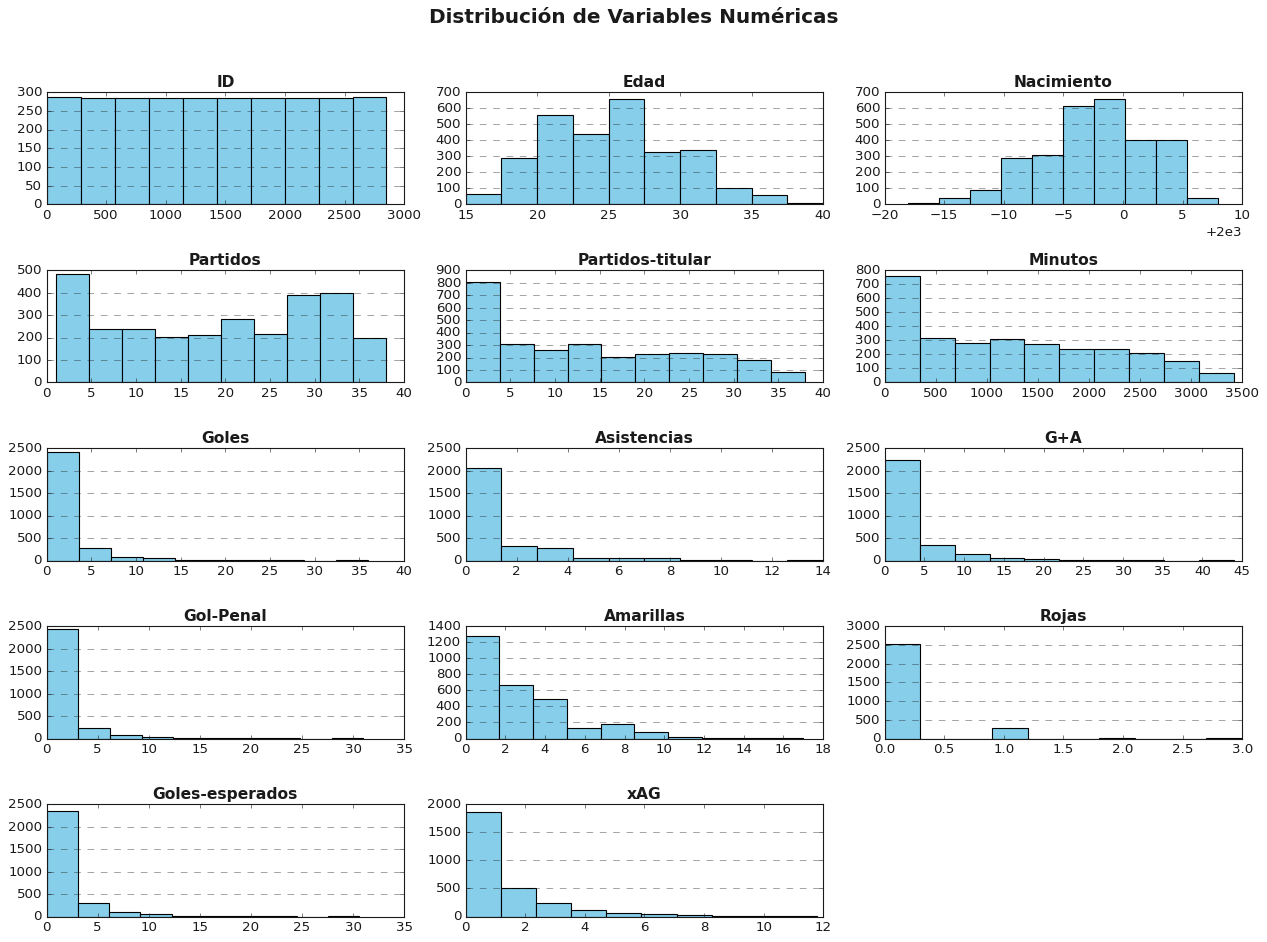

In [47]:
# Configuración de los histogramas
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(16, 12), facecolor='white')  # Fondo blanco, se ajusta el nrows para que entre la cantidad de columnas
#El nrows se ajusto de 4 a 5 ya que el dataframe tiene 14 columnas numericas y en un grafico de 4x3 solo entran 12
axes = axes.flatten()  # Aplanar ejes para facilitar iteración
columnas = df.select_dtypes(include='number').columns  # Seleccionar columnas numéricas

# Personalización del gráfico
for i, col in enumerate(columnas):
    ax = axes[i]
    ax.hist(df[col], bins=10, color='#87CEEB', edgecolor='black')  # Azul cielo
    ax.set_title(col, fontsize=14, fontweight='bold')  # Títulos de cada variable
    ax.grid(axis='y', linestyle='--', alpha=0.7)  # Cuadrícula horizontal
    ax.set_facecolor('white')  # Fondo blanco

# Ocultar ejes vacíos si hay menos gráficos que subgrillas
for j in range(len(columnas), len(axes)):
    fig.delaxes(axes[j])

# Título general del gráfico
plt.suptitle('Distribución de Variables Numéricas', fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustar diseño para evitar superposición
plt.show()

In [48]:
numericos = df.select_dtypes(include='number')

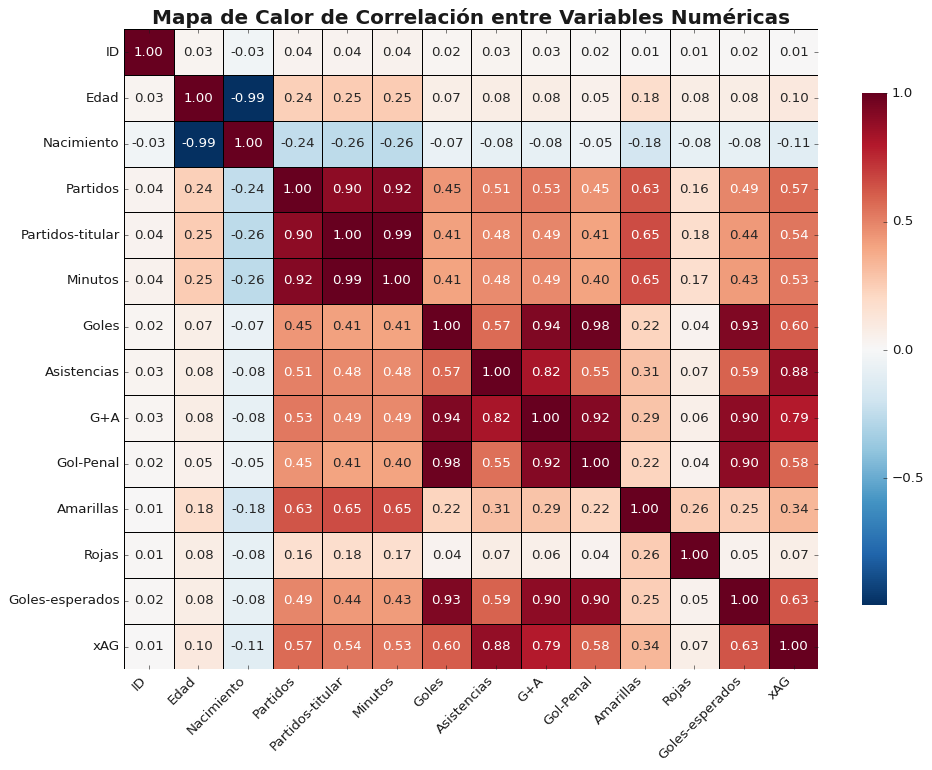

In [49]:
# Generar la matriz de correlación
correlation_matrix = numericos.corr()

# Configuración del gráfico
plt.figure(figsize=(14, 10), facecolor='white')  # Ajustar tamaño y fondo blanco
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',  # Formato de las anotaciones (2 decimales)
    cmap='RdBu_r',  # Paleta de colores más equilibrada
    cbar_kws={'shrink': 0.8},  # Tamaño reducido de la barra de color
    linewidths=0.5,
    linecolor='black'  # Líneas más visibles entre celdas
)

# Títulos y etiquetas
plt.title('Mapa de Calor de Correlación entre Variables Numéricas', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12, rotation=45, ha='right')  # Rotar y alinear las etiquetas
plt.yticks(fontsize=12)

# Mostrar gráfico
plt.show()

Fuerte correlación positiva:

Partidos, Partidos-titular, y Minutos tienen correlaciones extremadamente altas entre sí (~0.99). Esto refleja que los jugadores con más partidos también tienen más minutos y titularidades, lo cual es esperado.
Contribuciones ofensivas (Goles y Asistencias):

Goles y Asistencias tienen una correlación positiva fuerte (~0.59), lo que indica que los jugadores que marcan también tienden a asistir.
G+A (Goles + Asistencias) está altamente correlacionado con Goles (~0.93) y Asistencias (~0.79), validando que esta métrica refleja las contribuciones ofensivas totales.
Tarjetas y Minutos:

Tarjetas Amarillas tienen una correlación baja (~0.22) con los Minutos, lo que sugiere que no todos los jugadores que juegan más acumulan más tarjetas.
Tarjetas Rojas tienen una correlación aún menor (~0.13), lo que refuerza su rareza en comparación con las amarillas.
Variables relacionadas con goles esperados:

xG (Goles esperados) y Goles tienen una correlación positiva (~0.63), indicando que los modelos subyacentes predicen bien los goles anotados.
xAG (Asistencias esperadas) muestra una correlación fuerte con Asistencias (~0.88), validando su utilidad para medir la calidad de las oportunidades creadas.
Edad y Rendimiento:

Edad tiene correlaciones débiles con Goles (~0.06), Asistencias (~0.08) y Minutos (~0.25), lo que sugiere que el rendimiento no depende directamente de la edad, aunque puede haber patrones específicos según posiciones.

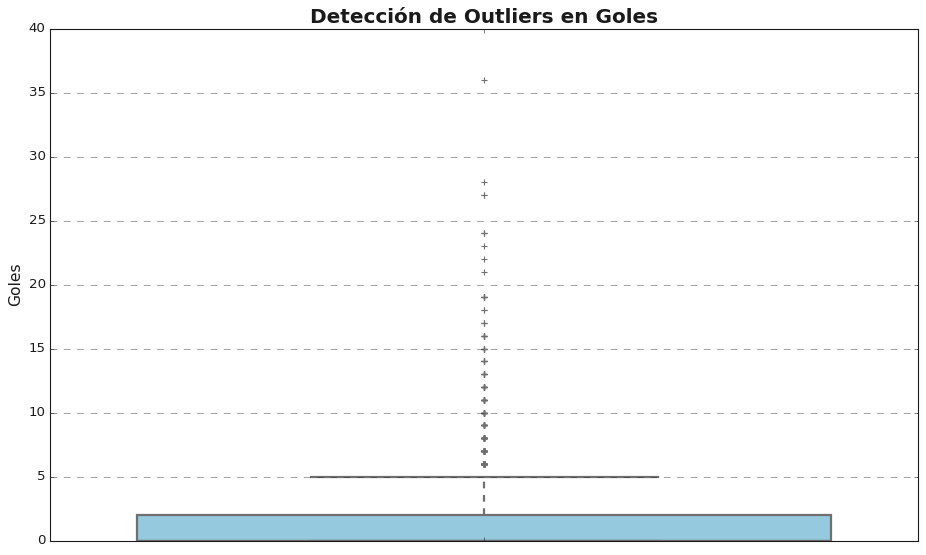

In [50]:
# Configuración del gráfico
plt.figure(figsize=(14, 8), facecolor='white')  # Fondo blanco
sns.boxplot(
    y='Goles',
    data=df,
    color='#87CEEB',  # Azul cielo más atractivo
    linewidth=2  # Bordes más definidos
)

# Títulos y etiquetas
plt.title('Detección de Outliers en Goles', fontsize=18, fontweight='bold')
plt.ylabel('Goles', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Cuadrícula horizontal

# Mostrar gráfico
plt.show()

Conclusiones de la gráfica:

Presencia de outliers significativos:

El boxplot revela varios outliers por encima del rango superior, lo que sugiere que hay jugadores excepcionales que destacan en goles marcados durante una temporada.
Los outliers pueden representar jugadores estrella o delanteros principales de los equipos.
Distribución asimétrica:

La mediana de los goles se encuentra muy cerca del límite inferior, indicando que la mayoría de los jugadores marcan pocos goles (0-5 por temporada).
Concentración en el rango bajo:

La caja del boxplot es muy estrecha, lo que indica que la mayoría de los jugadores tienen un rendimiento ofensivo bajo en términos de goles.
Rango intercuartil (IQR):

El rango entre el primer y tercer cuartil muestra que el grueso de los jugadores marca entre 0 y 2 goles.

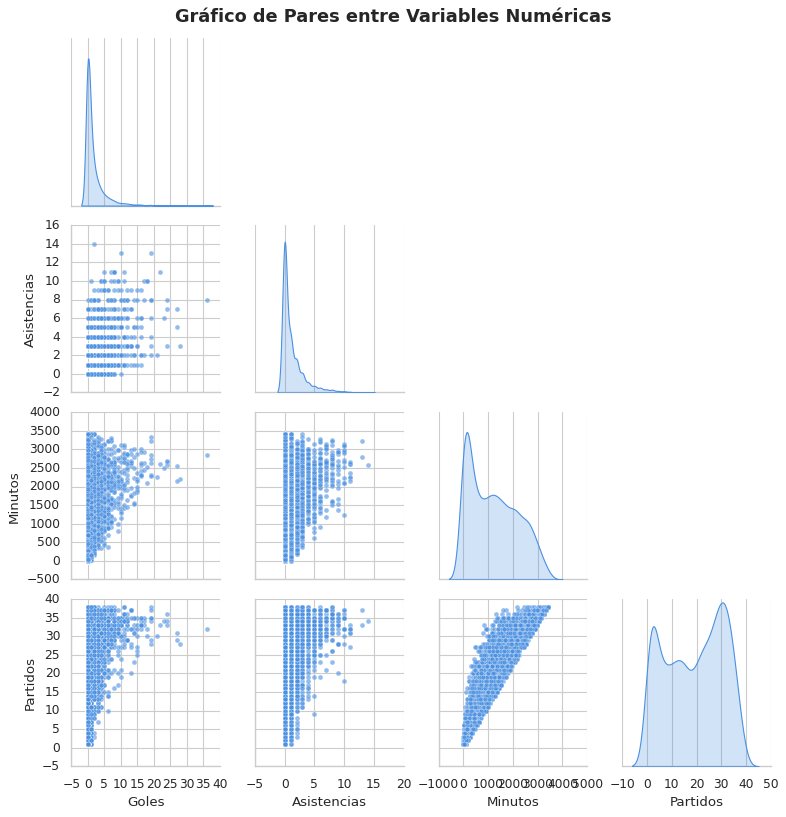

In [51]:
# Selección de columnas
selected_columns = ['Goles', 'Asistencias', 'Minutos', 'Partidos']

# Configuración de estilo
sns.set(style='whitegrid')  # Fondo blanco con cuadrícula

# Generar el gráfico de pares con ajustes
pairplot = sns.pairplot(
    df[selected_columns],
    diag_kind='kde',  # Usar estimaciones de densidad en la diagonal
    corner=True,  # Mostrar solo la parte inferior (evita duplicados)
    plot_kws={'alpha': 0.6, 'color': '#4A90E2'},  # Transparencia y color de puntos
    diag_kws={'color': '#4A90E2', 'fill': True}  # Usar 'fill' en lugar de 'shade'
)

# Ajustar título general y formato
pairplot.fig.suptitle(
    'Gráfico de Pares entre Variables Numéricas',
    fontsize=16, fontweight='bold', y=1.02
)

# Eliminar fondo gris
pairplot.fig.patch.set_facecolor('white')

# Mostrar gráfico
plt.show()

# Modelo de Clasificación: XGBoost

Para este conjunto de datos, se implementará un modelo de clasificación utilizando XGBoost (Extreme Gradient Boosting). Este algoritmo es reconocido por su rendimiento superior, capacidad para manejar relaciones no lineales, y flexibilidad en el ajuste de hiperparámetros. Además, proporciona información detallada sobre la importancia de las características, lo que lo convierte en una herramienta ideal para este análisis.


El objetivo es clasificar a los jugadores en dos categorías: por ejemplo, "Jugador Destacado" y "No Destacado", basándonos en métricas como la cantidad de goles o asistencias.

Pasos a Seguir

1. Preprocesamiento de Datos
Realizar la limpieza del conjunto de datos.
Convertir las variables categóricas a un formato numérico adecuado (por ejemplo, one-hot encoding o label encoding).
Gestionar valores nulos mediante imputación o eliminación, asegurando que no interfieran en el modelo.

2. División del Conjunto de Datos
Dividir el dataset en dos subconjuntos: uno para entrenamiento y otro para evaluación (por ejemplo, 80% entrenamiento y 20% prueba).

3. Entrenamiento del Modelo
Entrenar un modelo de XGBoost, ajustando hiperparámetros básicos como:
Número de árboles (n_estimators).
Tasa de aprendizaje (learning_rate).
Profundidad máxima de los árboles (max_depth).
Regularización (gamma, lambda, alpha).
Realizar una validación cruzada para optimizar el modelo y evitar el sobreajuste.

4. Evaluación del Modelo
Evaluar el modelo utilizando métricas de clasificación como:
Precisión (Accuracy).
Recall.
F1-Score.
AUC-ROC (para medir el rendimiento en datasets desbalanceados).
Analizar la importancia de las características utilizando el atributo feature_importances_ del modelo XGBoost para identificar las variables más relevantes en la clasificación.
Ventajas del Enfoque con XGBoost
Rendimiento Superior:

XGBoost generalmente supera a otros modelos de clasificación como Random Forest en precisión y robustez.
Manejo de Valores Perdidos:

Puede manejar valores faltantes de forma eficiente sin necesidad de preprocesamiento adicional.
Importancia de las Características:

Proporciona una clara visualización de las variables más relevantes, lo que facilita la interpretación de los resultados.
Optimización Integrada:

Incluye funcionalidades avanzadas como early stopping y regularización para evitar el sobreajuste.

In [52]:
# Importar librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# Import XGBClassifier after updating scikit-learn
from xgboost import XGBClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize

In [53]:
# Crear la columna de 'Jugador Destacado' o 'No Destacado'
df['Jugador_Destacado'] = np.where(df['Goles'] > df['Goles'].mean(), 1, 0)

In [54]:
# 1. Preprocesamiento de Datos
# Seleccionar características relevantes
features = ['Minutos', 'Partidos', 'Edad', 'Asistencias', 'Posicion']
X = df[features]
y = df['Jugador_Destacado']

In [55]:
# Codificación de variables categóricas (si es necesario)
X = pd.get_dummies(X, drop_first=True)

In [56]:
# 2. División de Datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
# Entrenar el modelo de XGBoost
xgb_model = XGBClassifier(
    n_estimators=100,         # Número de árboles
    learning_rate=0.1,        # Tasa de aprendizaje
    max_depth=5,              # Profundidad máxima de los árboles
    random_state=42,          # Semilla para reproducibilidad
    eval_metric='logloss'     # Métrica de evaluación
)


In [58]:
# Entrenar el modelo sin advertencias
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [59]:
# 4. Evaluación del Modelo
# Predicciones en el conjunto de prueba
y_pred = xgb_model.predict(X_test)

In [60]:
# Evaluar el rendimiento
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8271028037383178
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       605
           1       0.74      0.63      0.68       251

    accuracy                           0.83       856
   macro avg       0.80      0.77      0.78       856
weighted avg       0.82      0.83      0.82       856

Confusion Matrix:
 [[551  54]
 [ 94 157]]


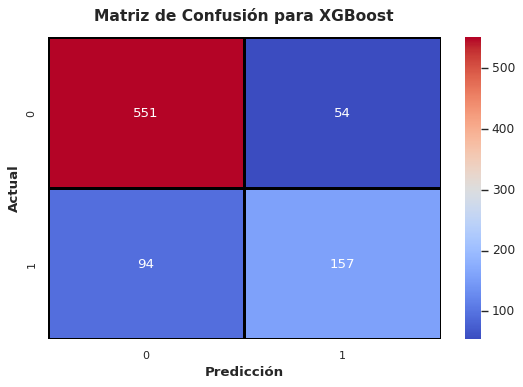

In [61]:
# Configuración del estilo para eliminar fondo gris
sns.set_style("white")  # Fondo blanco para el gráfico

# Obtener las predicciones del modelo XGBoost
y_pred = xgb_model.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualización de la matriz de confusión mejorada
plt.figure(figsize=(7, 5))  # Tamaño del gráfico
sns.heatmap(
    conf_matrix,
    annot=True,  # Mostrar los valores en las celdas
    fmt="d",  # Formato de los valores
    cmap="coolwarm",  # Colores mejorados (rojo-azul)
    cbar=True,  # Incluir barra de color
    linewidths=1,  # Líneas entre celdas
    linecolor='black'  # Color de las líneas
)

# Etiquetas y título mejorado
plt.xlabel("Predicción", fontsize=12, fontweight="bold")
plt.ylabel("Actual", fontsize=12, fontweight="bold")
plt.title("Matriz de Confusión para XGBoost", fontsize=14, fontweight="bold", pad=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [62]:
# Obtener la importancia de las características del modelo XGBoost
feature_importances = pd.Series(
    xgb_model.feature_importances_,  # Importancia de características
    index=X.columns  # Nombres de las columnas
).sort_values(ascending=False)  # Ordenar de mayor a menor

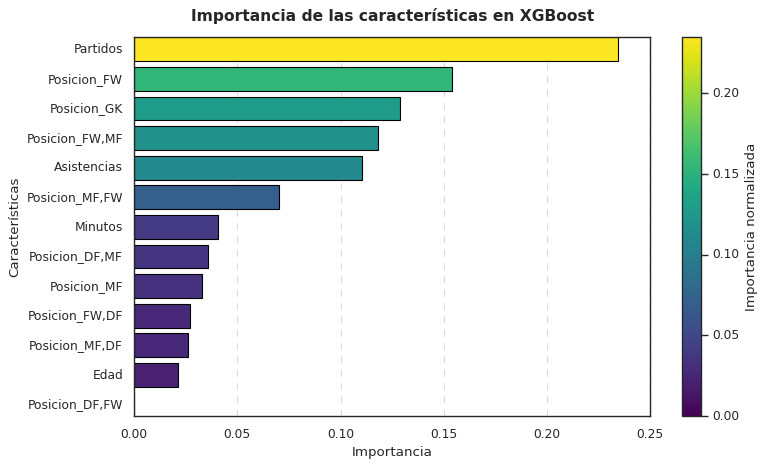

In [64]:
# feature_importances: pandas Series ordenada desc, index=nombre de features
feature_importances = pd.Series(
    xgb_model.feature_importances_, index=X.columns, name="importance"
).sort_values(ascending=False)

values = feature_importances.values

# --- Normalización y colores (robusto si todas las importancias son iguales) ---
if feature_importances.nunique() == 1:
    norm = Normalize(vmin=0.0, vmax=1.0)
    colors = cm.viridis(np.full(len(values), 0.5))  # mismo color para todas
    show_cbar = False
else:
    norm = Normalize(vmin=feature_importances.min(), vmax=feature_importances.max())
    colors = cm.viridis(norm(values))
    show_cbar = True

# --- Figura + ejes explícitos ---
fig, ax = plt.subplots(figsize=(10, 6))

ax.barh(
    feature_importances.index,
    values,
    color=colors,
    edgecolor="black"
)

ax.set_title("Importancia de las características en XGBoost", fontsize=14, fontweight="bold", pad=15)
ax.set_xlabel("Importancia", fontsize=12)
ax.set_ylabel("Características", fontsize=12)
ax.grid(axis="x", linestyle="--", alpha=0.7)
ax.invert_yaxis()  # más importante arriba

# --- Colorbar asociada al mismo Axes ---
if show_cbar:
    sm = cm.ScalarMappable(cmap=cm.viridis, norm=norm)
    sm.set_array([])
    fig.colorbar(sm, ax=ax, label="Importancia normalizada")

fig.tight_layout()
plt.show()


# CONCLUSION

El análisis realizado sobre el dataset de jugadores de fútbol, utilizando un modelo de clasificación basado en Gradient Boosting (XGBoost), permitió identificar con precisión qué jugadores podrían ser clasificados como “destacados” en función de sus características individuales.

A través del análisis, se logró una comprensión más profunda de la importancia relativa de diversas características en el rendimiento de los jugadores.

Puntos Destacados del Estudio:

Precisión del Modelo:

1.   Precisión del Modelo:

El modelo de clasificación basado en XGBoost alcanzó una precisión del 0.83, utilizando las variables de minutos jugados, edad, partidos, posición, goles y asistencias.
Esto confirma que existe una relación significativa entre las características seleccionadas y el rendimiento de los jugadores, lo que valida la elección de las variables.

2.   Importancia de las Características:

La evaluación de la importancia de las características muestra que variables como los minutos jugados y el número de asistencias tienen una influencia destacada en la probabilidad de que un jugador sea clasificado como “destacado”.
Esto puede atribuirse a que los jugadores con más minutos tienen más oportunidades de contribuir al equipo, mientras que las asistencias reflejan su capacidad para generar jugadas clave.



3.   Aplicaciones Estratégicas:

La capacidad de predecir qué jugadores tienen un desempeño destacado puede ser de gran utilidad para entrenadores y analistas al tomar decisiones estratégicas, como:
Identificar jugadores clave.
Planificar rotaciones en el equipo.
Evaluar posibles transferencias o compras de nuevos jugadores.


La capacidad de predecir qué jugadores tienen un desempeño destacado puede ser de gran utilidad para entrenadores y analistas al tomar decisiones estratégicas, como:

Identificar jugadores clave.

Planificar rotaciones en el equipo.

Evaluar posibles transferencias o compras de nuevos jugadores.

# Conclusión Final:

El uso de un modelo de clasificación basado en Gradient Boosting (XGBoost) resultó ser altamente efectivo y práctico para identificar jugadores destacados. Este modelo proporciona insights significativos sobre los factores que influyen en el rendimiento de cada futbolista, lo que puede ser invaluable tanto para la gestión del equipo como para la planificación estratégica en el fútbol profesional.

Además, la flexibilidad y robustez de XGBoost lo convierten en una herramienta poderosa para análisis similares en otros contextos deportivos.